In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Data Collection and Processing 

In [3]:
# loading the data to pandas dataframe: 
data = pd.read_csv("C:/Users/nn474/OneDrive/Desktop/Machinelearning/gld_price_data.csv")

In [4]:
# print the first 5 rows of the dataframe
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print the last 5 rows of the dataframe:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns in the dataframe: 
data.shape

(2290, 6)

In [8]:
# Descriptive anlytics about the dataframe:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# Checkig the missing values in the dataframe:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# Getting the statistical summary of the dataframe:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Visualisation of the data:


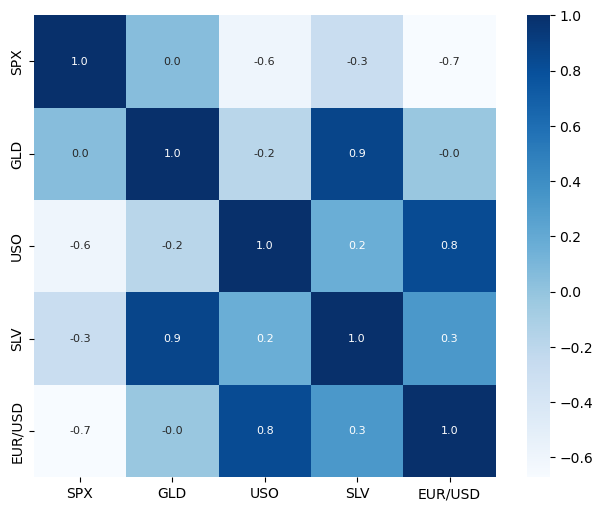

In [16]:
#constructing the heatmap tounderstan the correlation between the features:
correlation = data.select_dtypes(include='number').corr()
plt.figure(figsize=(8, 6))
sns.heatmap (correlation, cbar =True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')
plt.show()

In [17]:
# check the correlation values of GLD: 
correlation['GLD'].sort_values(ascending = False)

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64

Text(0.5, 1.0, 'Distribution of Gold Price')

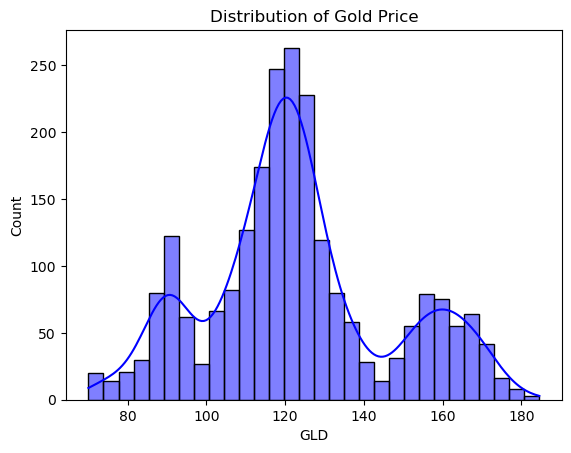

In [18]:
# the Histogram for the distribution of Gold Price:
sns.histplot(data['GLD'], kde=True, bins=30, color = 'blue')
plt.title('Distribution of Gold Price')

<Figure size 1200x600 with 0 Axes>

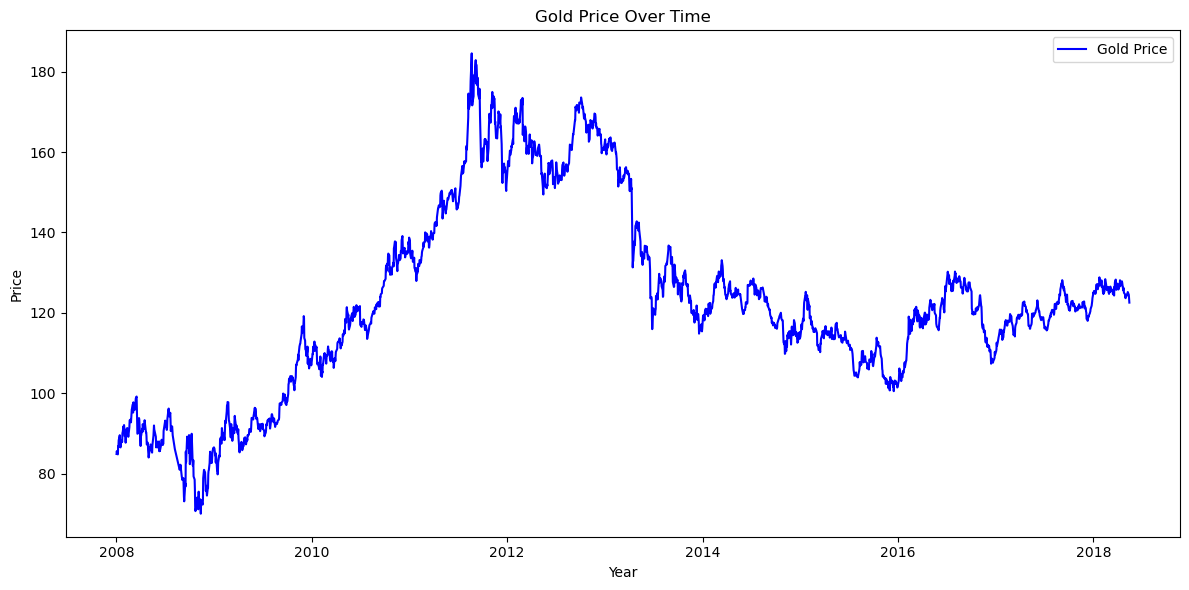

In [24]:
# the line graph for the Gold Price:
plt.figure(figsize=(12, 6))
data['Date'] = pd.to_datetime(data['Date']) 
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='GLD', label='Gold Price', color='Blue')
plt.title('Gold Price Over Time')
plt.grid(False)
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

# Using ML (Random Forest) to predict Gold Price:

In [26]:
# Splitting the features and target variable:
X = data.drop(['GLD','Date'], axis = 1)
Y = data['GLD']

In [27]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [28]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and Test Data:

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

Model training: Random Forest Regressor

In [35]:
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, Y_train)



RandomForestRegressor()

Model Evaluation:

In [56]:
# Prediction on the test data:
Y_pred = regressor.predict(X_test) 

In [57]:
print(Y_pred)

[168.61869981  82.15999985 115.93979977 127.76130074 120.69320163
 154.79809779 149.95459837 126.0879007  117.57619886 125.89940109
 116.65590109 171.85130066 141.15969826 168.02299821 115.19790002
 117.8103003  137.55570343 170.38220069 159.6217028  159.00109958
 154.97809977 125.40600008 175.3255996  156.92620289 125.2073003
  93.91519973  78.13129985 120.60410006 119.13009991 167.52559982
  88.33800074 125.40720004  91.08580069 117.75460043 121.15299879
 136.05780053 115.39220112 115.22920101 145.30839827 107.01420089
 104.61250258  87.29809802 126.55200049 117.98049985 154.57069902
 119.71729984 108.33789992 107.99639829  93.13950024 127.05929774
  74.47740067 113.66299895 121.54690001 111.40379897 119.10589931
 120.98309932 159.76680034 167.43700046 146.80189664  85.69219872
  94.41130023  86.80759886  90.3631997  119.0450006  126.39740052
 127.60009961 168.56259957 122.34249913 117.33379912  98.73060006
 168.31580051 142.97569843 132.4392022  121.36920219 120.87849957
 119.668800

In [59]:
# Rsquare error:
error_score = metrics.r2_score(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("Random Forest Regressor Performance Report")
print("R squared Error: ", error_score)
print(f"R² Score: {r2:.8f}")
print(f"MAE     : {mae:.8f}")
print(f"MSE     : {mse:.8f}")
print(f"RMSE    : {rmse:8f}")

Random Forest Regressor Performance Report
R squared Error:  0.9899921874102011
R² Score: 0.98999219
MAE     : 1.30661513
MSE     : 5.27855571
RMSE    : 2.297511


# Compare the Actual Values and rpedicted Values: 

In [61]:
Y_test = list(Y_test)

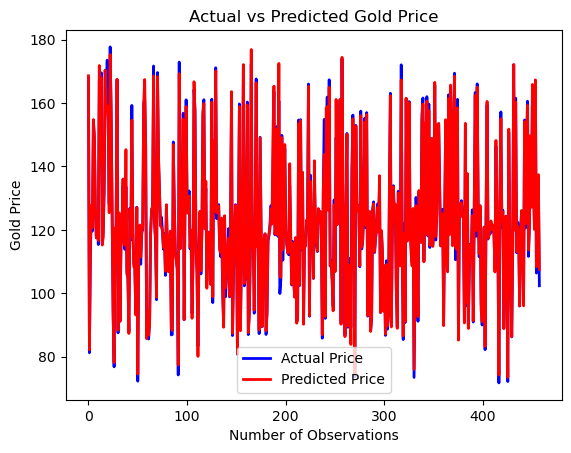

In [62]:
plt.plot(Y_test, color = 'blue', label = 'Actual Price', linewidth = 2)
plt.plot(Y_pred, color = 'red', label = 'Predicted Price', linewidth = 2)   
plt.title('Actual vs Predicted Gold Price')
plt.xlabel('Number of Observations')
plt.ylabel('Gold Price')    
plt.legend()
plt.show()